# Mounting and Loading

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# %cd /gdrive/MyDrive/Projects/Stylumia
# !unzip stumbleupon.zip
# !rm stumbleupon.zip
# !unzip /gdrive/MyDrive/Projects/Stylumia/raw_content.zip
# !rm /gdrive/MyDrive/Projects/Stylumia/raw_content.zip
# %cd /content/

In [ ]:
!pip install torch==1.6.0 

     |████████████████████████████████| 748.8MB 19kB/s 
ERROR: torchvision 0.8.2+cu101 has requirement torch==1.7.1, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: torch 1.7.1+cu101
    Uninstalling torch-1.7.1+cu101:
      Successfully uninstalled torch-1.7.1+cu101


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import nltk
import re
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')

import torch
from torchtext import data
import torch.nn as nn
import torch.optim as optim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Data

In [ ]:
# Reading relevant data from the dataset
df = pd.read_csv('/gdrive/MyDrive/Projects/Stylumia/train.tsv',sep = '\t',usecols=['urlid','boilerplate','label'])
test = pd.read_csv('/gdrive/MyDrive/Projects/Stylumia/test.tsv',sep = '\t',usecols=['urlid','boilerplate'])

In [ ]:
print(df.shape)
print(test.shape)

(7395, 3)
(3171, 2)


In [ ]:
df.head()

,urlid,boilerplate,label
0,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",0
1,8471,"{""title"":""The Fully Electronic Futuristic Star...",1
2,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",1
3,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",1
4,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",0


# Cleaning Text

In [ ]:
# Removing title, url and {} brackets
df['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
df['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)

df['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)
df['boilerplate']=df['boilerplate'].str.lower()

test['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
test['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)

test['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)
test['boilerplate']=test['boilerplate'].str.lower()

In [ ]:
df.head()

,urlid,boilerplate,label
0,4042,"""ibm sees holographic calls air breathing batt...",0
1,8471,"""the fully electronic futuristic starting gun ...",1
2,1164,"""fruits that fight the flu fruits that fight t...",1
3,6684,"""10 foolproof tips for better sleep "",""body"":""...",1
4,9006,"""the 50 coolest jerseys you didn t know existe...",0


In [ ]:
def clean(df,col):
  # Regex Processing
  def reg(text):
      text = text.replace('''"body"''',' ')
      text = text.replace(''',''',' ')
      text = re.sub(r'@\w+|rt\s@\w+|https?:\/\/.*[\r]*|#\w+|[^\w\s]|[0-9]*|', '', str(text).lower().strip())
      text = re.sub('[ \t]+' , ' ', str(text))
      return text

  # Removing StopWords
  def stopWordRemoval(x):
      x = ' '.join([word for word in str(x).split() if word not in (stop)])
      return x
      
  # Lemmating tweets
  w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
  lemmatizer = nltk.stem.WordNetLemmatizer()
  def lemmatize_text(text):
      return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

  df[col] = df[col].apply(reg)
  df[col] = df[col].apply(stopWordRemoval)
  df[col] = df[col].apply(lemmatize_text)
  return df

# Cleaning, Removing Stop Words, Tokenizing and Lemmatizing text
df = clean(df,'boilerplate')
test = clean(test,'boilerplate')
df.head()

,urlid,boilerplate,label
0,4042,ibm see holographic call air breathing battery...,0
1,8471,fully electronic futuristic starting gun elimi...,1
2,1164,fruit fight flu fruit fight flu cold flu men h...,1
3,6684,foolproof tip better sleep period life lot pro...,1
4,9006,coolest jersey know existed coolest jersey hav...,0


In [ ]:
(df.iloc[9,1])

'howsweeteats cooky cream brownie cooky cream brownie sweet brownie seems get one full week without trying new brownie combination wait see next one going experiment super simple used go brownie recipe added oreo could even boxed brownie make frosting add cooky frosted love frosting brownie mr sweet really enjoyed frosted one waste good day twitter like know last night mr sweet brought home dozen hot pink rose make dinner half unpacked mess strewn different room holey sweat pant got home oh yes half asleep professed undying love continued lay sound eerily similar night proposed good thing brownie counter dad say marriage rarely cooky somewhat melted batter baked look closely see cooky inside brownie best part frosting frosting used cooky cream cupcake creamy delicious look like ice cream beat think brownie made past month one may best love texture chewy gooey brownie crunchy cooky cooky cream brownie square baking chocolate lb butter cup sugar egg cup flour teaspoon vanilla oreo cooky 

In [ ]:
test.iloc[1:11]

,boilerplate
1,lolpics stun grenade ar funny picture lolpicss...
2,treadmill treadmill stair climber treadmill xc...
3,father tactic used assad crush revolt threaten...
4,stem turn lemon lime juicy atomizer gadget lab...
5,denmark aim improve health fat tax fat tax den...
6,loud snoring related silent stroke snoring unp...
7,sweet potato ravioli lemon sage brown butter s...
8,offbeat funny news design art graffiti funny h...
9,fell asleep watching dvd fell asleep watching ...
10,marthastewart lighter sesame noodle


In [ ]:
# df.drop(columns='urlid',inplace=True)
# test.drop(columns='urlid',inplace=True)

# Tensorizing Data

In [ ]:
# Spliting into Train and Validation set
train, val  = train_test_split(df,random_state = 42,test_size = 0.2)
print(train.shape,val.shape)

(5916, 2) (1479, 2)


In [ ]:
TEXT = data.Field(tokenize = 'spacy', include_lengths = True)
LABEL = data.LabelField(dtype = torch.float)

In [ ]:
# Creating Dataset class 
class DataFrameDataset(data.Dataset):

    def __init__(self, df, fields, is_test=False, **kwargs):
        examples = []
        for i, row in df.iterrows():
            label = row.label if not is_test else None
            text = row.boilerplate
            examples.append(data.Example.fromlist([text, label], fields))

        super().__init__(examples, fields, **kwargs)

    @staticmethod
    def sort_key(ex):
        return len(ex.text)

    @classmethod
    def splits(cls, fields, train_df, val_df=None, test_df=None, **kwargs):
        train_data, val_data, test_data = (None, None, None)
        data_field = fields

        if train_df is not None:
            train_data = cls(train_df.copy(), data_field, **kwargs)
        if val_df is not None:
            val_data = cls(val_df.copy(), data_field, **kwargs)
        if test_df is not None:
            test_data = cls(test_df.copy(), data_field, True, **kwargs)

        return tuple(d for d in (train_data, val_data, test_data) if d is not None)

In [ ]:
# Creating torch Datasets 
fields = [('text',TEXT),('label',LABEL)]
train_ds, val_ds, test_ds = DataFrameDataset.splits(fields, train_df=train, val_df=val, test_df=test)

In [ ]:
# Lets look at a random example
print((test_ds[0]))

# Check the type 
print(type(train_ds[15]))

{'text': ['homemade', 'enchilada', 'sauce', 'lynn', 'kitchen', 'adventure', 'usually', 'buy', 'enchilada', 'sauce', 'yes', 'knew', 'making', 'never', 'found', 'recipe', 'really', 'happy', 'tried', 'several', 'good', 'stuck', 'canned', 'stuff', 'get', 'grocery', 'store', 'recently', 'talking', 'friend', 'mine', 'lived', 'mexico', 'year', 'know', 'mexican', 'cooking', 'asked', 'made', 'enchilada', 'sauce', 'told', 'basic', 'gave', 'exact', 'recipe', 'decided', 'give', 'try', 'recipe', 'really', 'good', 'best', 'enchilada', 'sauce', 'made', 'great', 'flavor', 'think', 'even', 'better', 'canned', 'sauce', 'husband', 'thought', 'could', 'spicier', 'like', 'enchilada', 'spicy', 'always', 'add', 'chili', 'powder', 'chilies', 'like', 'really', 'spicy', 'kid', 'thought', 'really', 'good', 'like', 'change', 'two', 'thing', 'called', 'green', 'onion', 'used', 'regular', 'onion', 'thought', 'worked', 'great', 'probably', 'continue', 'make', 'way', 'also', 'pureed', 'everything', 'blender', 'wanted

In [ ]:
# Loading Glove embeddings and building vocab
MAX_VOCAB_SIZE = 50000

TEXT.build_vocab(train_ds, 
                 vectors = 'glove.42B.300d',
                 max_size = MAX_VOCAB_SIZE,
                 unk_init = torch.Tensor.zero_)

.vector_cache/glove.42B.300d.zip: 1.88GB [05:54, 5.30MB/s]                           
100%|█████████▉| 1917222/1917494 [03:30<00:00, 9571.93it/s]

In [ ]:
LABEL.build_vocab(train_ds)

In [ ]:
# Creating torch iterators
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
                                                                (train_ds, val_ds, test_ds), 
                                                                batch_size = BATCH_SIZE,
                                                                sort_within_batch = True,
                                                                device = device
                                                                                )

# Model

## Architecture 

In [ ]:
# Creating a pytorch BiLSTM Model
class Model(nn.Module):
    def __init__(self, num_emb, emb_dim, pad_idx, hi_s,out_s, num_la, bidir, drop):
        super().__init__()
        self.bidir = bidir

        self.emb =nn.Embedding(num_embeddings=num_emb,
                               embedding_dim=emb_dim,
                               padding_idx=pad_idx)
        self.lstm =nn.LSTM(input_size=emb_dim,
                           hidden_size=hi_s,
                           num_layers=num_la,
                           bidirectional=bidir,
                           dropout = drop)
        if bidir:
          self.fc_bi = nn.Linear(2*hi_s,hi_s)

        self.fc_class = nn.Linear(hi_s,out_s)
        self.dropout = nn.Dropout(drop)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self,text,text_len):

        embed = self.emb(text)
        pack = nn.utils.rnn.pack_padded_sequence(embed, text_len)
        out, (hid,cell)  = self.lstm(pack)

        if self.bidir:
          hid = self.dropout(torch.cat((hid[-2,:,:], hid[-1,:,:]), dim = 1))
          hid = self.fc_bi(hid)

        out = self.fc_class(hid)
        out = torch.squeeze(out)
        out = self.sigmoid(out)

        return out

## Model Initialising

In [ ]:
# Hyperparameters
INPUT_DIM = len(TEXT.vocab)
EMBED_DIM = 300
HID_DIM = 128
OUT_DIM = 1
N_LAYERS = 4
BIDIR = True
DROP = 0.3
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token] 

# Initialising Model
net = Model(num_emb = INPUT_DIM,
            emb_dim = EMBED_DIM,
            pad_idx = PAD_IDX,
            out_s = OUT_DIM,
            hi_s = HID_DIM,
            num_la = N_LAYERS,
            bidir = BIDIR,
            drop = DROP)
print(net)

Model(
  (emb): Embedding(50002, 300, padding_idx=1)
  (lstm): LSTM(300, 128, num_layers=4, dropout=0.3, bidirectional=True)
  (fc_bi): Linear(in_features=256, out_features=128, bias=True)
  (fc_class): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
)


In [ ]:
# Loading pretrained embeddings into model
pretrained_embeddings = TEXT.vocab.vectors
net.emb.weight.data.copy_(pretrained_embeddings)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.7597, -0.4705,  0.3506,  ..., -0.5511, -1.0083, -0.3430],
        ...,
        [ 0.2246, -0.8849,  0.0183,  ..., -0.6791, -0.0796, -0.4462],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0900, -0.1820,  0.0088,  ..., -0.3197,  0.0116,  0.1448]])

In [ ]:
# To initiaise padded to zeros
net.emb.weight.data[PAD_IDX] = torch.zeros(EMBED_DIM)

In [ ]:
# Defining Loss and Optimizer 
lr = 1e-4
# wt_dy = 1e-6
net.to(device)
criterion = nn.BCEWithLogitsLoss()
opt = optim.Adam(net.parameters(),lr=lr)
scheduler = optim.lr_scheduler.StepLR(opt,75,0.1)

## Helper Functions

In [ ]:
# Accuracy function
def accuracy(pred,true):
    rounded_pred = torch.round(torch.sigmoid(pred))
    correct = (rounded_pred == true).float()
    return correct.sum()/len(correct)

In [ ]:
# training function 
def train(model, iterator):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        text, text_lengths = batch.text
        
        opt.zero_grad()
        predictions = model(text, text_lengths)
        loss = criterion(predictions, batch.label)
        acc = accuracy(predictions, batch.label)

        loss.backward()
        opt.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
# evaluation function
def evaluate(model, iterator):
    
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:
            text, text_lengths = batch.text
            predictions = model(text, text_lengths)
            loss = criterion(predictions, batch.label)
            acc = accuracy(predictions, batch.label)
            
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
# Score function
def evaluate_scores(model, iterator):
    
    epoch_acc = 0
    epoch_f1 = 0
    epoch_recall = 0
    epoch_precision = 0
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:
            text, text_lengths = batch.text
            predictions = model(text, text_lengths)
            rounded_pred = torch.round(torch.sigmoid(predictions))
            acc = accuracy_score(rounded_pred.to('cpu'),batch.label.to('cpu'))
            f1 = f1_score(rounded_pred.to('cpu'),batch.label.to('cpu'))
            pre = precision_score(rounded_pred.to('cpu'),batch.label.to('cpu'))
            rec = recall_score(rounded_pred.to('cpu'),batch.label.to('cpu'))
            
            epoch_acc += acc.item()
            epoch_f1 += f1.item()
            epoch_precision += pre.item()
            epoch_recall += rec.item()
    
    print("Accuracy: %0.4f, F1: %0.4f, Precision: %0.4f, Recall %0.4f"%(epoch_acc/len(iterator),epoch_f1/len(iterator),epoch_precision/len(iterator),epoch_recall/len(iterator)))
    return 

## Train Model

In [ ]:
# Checking Cuda
print(torch.cuda.is_available())
print(device)

True
cuda


In [ ]:
%%time
# Training Model
num_epochs = 200
loss=[]
val_loss=[]
acc=[]
val_acc=[]
best_val_acc = 0.0
for epoch in range(num_epochs):

    train_loss, train_acc = train(net, train_iterator)
    valid_loss, valid_acc = evaluate(net, valid_iterator)
    if scheduler is not None:
        scheduler.step()
    if epoch % 10 == 0:
        print(f'EPOCH:{epoch:d}/{num_epochs:d} |Train Loss: {train_loss:.3f} |Train Acc: {train_acc*100:.2f}% |Val. Loss: {valid_loss:.3f} |Val. Acc: {valid_acc*100:.2f}%')
    if valid_acc > best_val_acc:
        best_val_acc = valid_acc
        torch.save(net.state_dict(), "/gdrive/MyDrive/Projects/Stylumia/bestModel.pt")
    loss.append(train_loss)
    val_loss.append(valid_loss)
    acc.append(train_acc)
    val_acc.append(valid_acc)

EPOCH:0/200 |Train Loss: 0.685 |Train Acc: 48.53% |Val. Loss: 0.629 |Val. Acc: 48.59%
EPOCH:10/200 |Train Loss: 0.584 |Train Acc: 79.73% |Val. Loss: 0.607 |Val. Acc: 77.95%
EPOCH:20/200 |Train Loss: 0.578 |Train Acc: 82.17% |Val. Loss: 0.608 |Val. Acc: 79.38%
EPOCH:30/200 |Train Loss: 0.575 |Train Acc: 82.81% |Val. Loss: 0.609 |Val. Acc: 79.91%
EPOCH:40/200 |Train Loss: 0.575 |Train Acc: 83.80% |Val. Loss: 0.610 |Val. Acc: 79.12%
EPOCH:50/200 |Train Loss: 0.573 |Train Acc: 83.86% |Val. Loss: 0.608 |Val. Acc: 78.99%
EPOCH:60/200 |Train Loss: 0.571 |Train Acc: 84.96% |Val. Loss: 0.614 |Val. Acc: 79.65%
EPOCH:70/200 |Train Loss: 0.570 |Train Acc: 86.42% |Val. Loss: 0.608 |Val. Acc: 80.37%
EPOCH:80/200 |Train Loss: 0.569 |Train Acc: 86.23% |Val. Loss: 0.607 |Val. Acc: 80.24%
EPOCH:90/200 |Train Loss: 0.569 |Train Acc: 86.25% |Val. Loss: 0.607 |Val. Acc: 80.30%
EPOCH:100/200 |Train Loss: 0.569 |Train Acc: 86.32% |Val. Loss: 0.607 |Val. Acc: 80.30%
EPOCH:110/200 |Train Loss: 0.568 |Train Acc

KeyboardInterrupt: ignored

## Plots and Metrics

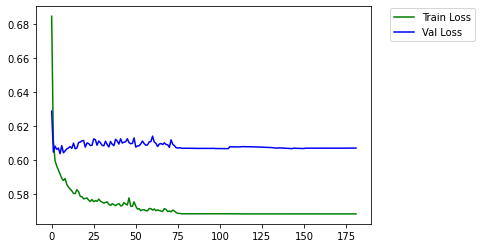

In [ ]:
# Plotting loss
plt.plot(np.arange(len(loss)),loss,'g',label='Train Loss')
plt.plot(np.arange(len(val_loss)),val_loss,'b',label='Val Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.show()

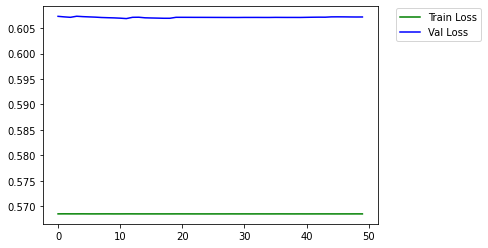

In [ ]:
# Plotting loss of last 50 epochs
plt.plot(np.arange(len(loss[-50:])),loss[-50:],'g',label='Train Loss')
plt.plot(np.arange(len(val_loss[-50:])),val_loss[-50:],'b',label='Val Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.show()

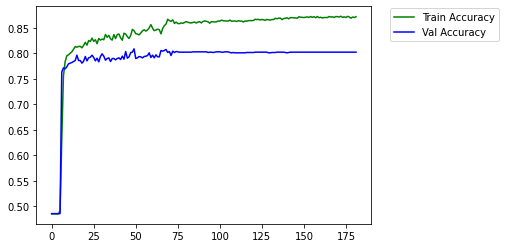

In [ ]:
# Plotting Accuraries
plt.plot(np.arange(len(acc)),acc,'g',label='Train Accuracy')
plt.plot(np.arange(len(val_acc)),val_acc,'b',label='Val Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.show()

In [ ]:
# Calculating Train Scores
_, train_acc_final = evaluate(net, train_iterator)
print("Train Accuracy = ", train_acc_final*100, "%")
evaluate_scores(net, train_iterator)

Train Accuracy =  87.36319131748651 %
Accuracy: 0.8736, F1: 0.8608, Precision: 0.8553, Recall 0.8729


In [ ]:
# Calculating Val Scores
_, val_acc_final = evaluate(net, valid_iterator)
print("Val Accuracy = ", val_acc_final*100, "%")
evaluate_scores(net, valid_iterator)

Val Accuracy =  80.23623526096344 %
Accuracy: 0.8024, F1: 0.7764, Precision: 0.7881, Recall 0.7703


## Inference

In [ ]:
best = Model(num_emb = INPUT_DIM,
            emb_dim = EMBED_DIM,
            pad_idx = PAD_IDX,
            out_s = OUT_DIM,
            hi_s = HID_DIM,
            num_la = N_LAYERS,
            bidir = BIDIR,
            drop = DROP)
best.load_state_dict(torch.load("/gdrive/MyDrive/Projects/Stylumia/bestModel.pt"))

<All keys matched successfully>

In [ ]:
best.to(device)

Model(
  (emb): Embedding(50002, 300, padding_idx=1)
  (lstm): LSTM(300, 128, num_layers=4, dropout=0.3, bidirectional=True)
  (fc_bi): Linear(in_features=256, out_features=128, bias=True)
  (fc_class): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
)

In [ ]:
# Calculating Train Scores
_, train_acc_final = evaluate(best, train_iterator)
print("Train Accuracy = ", train_acc_final*100, "%")
evaluate_scores(net, train_iterator)

Train Accuracy =  85.02304150212196 %
Accuracy: 0.8736, F1: 0.8613, Precision: 0.8553, Recall 0.8743


In [ ]:
_, val_acc_final = evaluate(best, valid_iterator)
print("Val Accuracy = ", val_acc_final*100, "%")
evaluate_scores(net, valid_iterator)

Val Accuracy =  80.8872769276301 %
Accuracy: 0.8024, F1: 0.7764, Precision: 0.7881, Recall 0.7703
